# Тестовое задание Devim (Data Analyst)

## Задача

В архиве во вложении данные по выдачам кредитов и платежам: плановым и фактическим. Данные актуальны на 08.12.2022. Проанализируйте характер поведения клиентов с точки зрения просрочки: какая динамика просрочки, наблюдается ли рост или снижение?

##### Данные в распоряжении:

order_id – номер заявки

created_at - дата создания заявки

put_at - дата выдачи

closed_at - дата закрытия

issued_sum - сумма выдачи

plan_at - дата планового платежа

plan_sum_total - сумма планового платежа (накопленным итогом)

paid_at - дата фактического платежа

paid_sum - сумма фактического платежа

In [1]:
! pip install pandas

������ ������� ��࠭��: 1251



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib

������ ������� ��࠭��: 1251



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install seaborn

������ ������� ��࠭��: 1251



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install plotly

������ ������� ��࠭��: 1251



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Загрузим датасеты и проведем первичный анализ

In [6]:
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
plan = pd.read_csv('plan.csv')

In [7]:
#функция для просмотра первичной информации о датасете
def inspection(df):
    q = display(df)
    a = df.info()
    b = df.duplicated().sum()
    w = df.isna().sum()
    return q, a, print('Количество явных дубликатов:', '\n', b), print('Количество пропусков в колонках:', '\n', w)

Датасет orders

In [8]:
inspection(orders)

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0
...,...,...,...,...,...
55743,495174013,2022-08-31 23:29:32.000,2022-09-01 00:07:26.307,NaN,9500.0
55744,495174505,2022-08-31 23:41:57.997,2022-09-05 17:51:19.003,2022-09-16 18:36:09.857,14930.0
55745,495175322,2022-08-31 23:46:04.997,2022-09-01 00:03:52.010,2022-09-09 21:08:18.970,4000.0
55746,495176080,2022-08-31 23:47:20.997,2022-08-31 23:49:03.027,2022-09-12 00:58:57.037,5000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
Количество явных дубликатов: 
 0
Количество пропусков в колонках: 
 order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64


(None, None, None, None)

In [9]:
orders['issued_sum']. unique()

array([13600., 20000.,  5820.,  9000.,  5000., 14600.,  9500., 10000.,
        5430.,  3000.,  2000.,  3450.,  4070., 13200.,  7000.,  4000.,
        8140.,  6790., 14930.,  6850., 10850., 12210.,  8000., 16070.,
       10220., 16900.,  2920.,  1720., 13570.,  1000., 15000., 16280.,
        8740.,  8500.,  6000., 11680., 13000.,  2720., 11000., 25770.,
        5150.,  4380., 28570., 12000., 17520.,  7290., 20350., 11900.,
       10200., 24430., 18000., 22970., 17640., 14000., 27130., 21550.,
       19000., 16000., 20180., 18850., 21700., 17000., 27210., 24370.,
        6250., 23090.,  2390., 12700., 15300.,  2570.])

Проверим наличие дубликатов в колонке order_id

In [10]:
print('Количество дубликатов в колонке order_id:', orders['order_id'].duplicated().sum())

Количество дубликатов в колонке order_id: 0


В датасете orders  содержит информацию о датах открытия, даты выдачи, закрытия и сумме кредита. Имеем 55748 строк, 5 колонок.

Дубликатов не обнаружено. Имеем колонки created_at, put_at, closed_at у которых неверно указан тип данных, изменим его на datetime.

В колонке issued_sum можем изменить тип на int, так как в колонке только целые значения.

Имеем пропуски в колонке closed_at, связано с тем что клиент не закрыл еще кредит.


Датасет payments

In [11]:
inspection(payments)

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.00
1,400018480,2022-06-02 01:52:05.707,1070.00
2,400032001,2022-06-02 04:55:40.307,4200.00
3,400033195,2022-06-02 05:44:23.480,2850.00
4,400039407,2022-06-02 06:53:54.503,10100.00
...,...,...,...
143279,469255350,2022-12-08 12:57:23.747,343.99
143280,452985418,2022-12-08 12:59:40.997,984.83
143281,490824962,2022-12-08 13:09:21.673,866.04
143282,480026135,2022-12-08 13:25:11.987,1193.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB
Количество явных дубликатов: 
 5
Количество пропусков в колонках: 
 order_id    0
paid_at     0
paid_sum    0
dtype: int64


(None, None, None, None)

In [12]:
print('Количество дубликатов в колонке order_id:', payments['order_id'].duplicated().sum())

Количество дубликатов в колонке order_id: 89554


In [13]:
payments['order_id'].value_counts()

order_id
430566924    33
415582411    21
455055318    19
412111350    19
421399602    18
             ..
441063242     1
451033029     1
413238583     1
454522553     1
465060685     1
Name: count, Length: 53730, dtype: int64

In [14]:
payments['paid_sum'].value_counts()

paid_sum
720.00     3858
1070.00    2140
2140.00    1525
1430.00    1519
4600.00    1511
           ... 
1171.54       1
2012.00       1
591.30        1
3486.68       1
343.99        1
Name: count, Length: 16086, dtype: int64

В датасете payments имеем данные о дате и сумме фактического платежа клиентов. 143284 строк, 3 колонки.

Пропусков в данных нет. Имеются дубликаты. Колонка paid_at имеет тип данных object, но колонка показывает дату фактического платежа, изменим на тип данных datetime. 

Датасет plan.

In [15]:
inspection(plan)

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.00
1,400001732,2022-07-02,9450.00
2,400001732,2022-08-01,12170.00
3,400001732,2022-08-31,14890.00
4,400001732,2022-09-30,17610.00
...,...,...,...
420277,495177509,2022-12-22,34248.70
420278,495177509,2023-01-06,36863.04
420279,495177509,2023-01-21,39440.38
420280,495177509,2023-02-05,41980.73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB
Количество явных дубликатов: 
 0
Количество пропусков в колонках: 
 order_id          0
plan_at           0
plan_sum_total    0
dtype: int64


(None, None, None, None)

In [16]:
plan['order_id'].value_counts()

order_id
487142846    25
479493884    16
470408029    14
448009521    13
452411354    13
             ..
423439734     1
468875140     1
468874039     1
468871731     1
442186265     1
Name: count, Length: 55748, dtype: int64

### Исследовательский анализ и предобработка данных

Предварительно сзделаем копии, в случае, если необходим будет оригинал датасета.

In [17]:
orders_copy = orders.copy()
payments_copy = payments.copy()
plan_copy = plan.copy()

Изменим тип данных у выделенных колонок на предыдущем этапе.

In [18]:
#датасет orders_copy

orders_copy['created_at'] = pd.to_datetime(orders_copy['created_at']).dt.date
orders_copy['created_at'] = pd.to_datetime(orders_copy['created_at'])

orders_copy['put_at'] = pd.to_datetime(orders_copy['put_at']).dt.date
orders_copy['put_at'] = pd.to_datetime(orders_copy['put_at'])

orders_copy['closed_at'] = pd.to_datetime(orders_copy['closed_at']).dt.date
orders_copy['closed_at'] = pd.to_datetime(orders_copy['closed_at'])

orders_copy['issued_sum'] = orders_copy['issued_sum'].astype('int64')

#датасет payments_copy

payments_copy['paid_at'] = pd.to_datetime(payments_copy['paid_at']).dt.date
payments_copy['paid_at'] = pd.to_datetime(payments_copy['paid_at'])

#датасет plan_copy

plan_copy['plan_at'] = pd.to_datetime(plan_copy['plan_at']).dt.date
plan_copy['plan_at'] = pd.to_datetime(plan_copy['plan_at'])


In [19]:
print('Тип данных колонок датасета orders_copy:', '\n', orders_copy.dtypes, '\n')
print('Тип данных колонок датасета payments_copy:', '\n', payments_copy.dtypes, '\n')
print('Тип данных колонок датасета plan_copy:', '\n', plan_copy.dtypes, '\n')

Тип данных колонок датасета orders_copy: 
 order_id               int64
created_at    datetime64[ns]
put_at        datetime64[ns]
closed_at     datetime64[ns]
issued_sum             int64
dtype: object 

Тип данных колонок датасета payments_copy: 
 order_id             int64
paid_at     datetime64[ns]
paid_sum           float64
dtype: object 

Тип данных колонок датасета plan_copy: 
 order_id                   int64
plan_at           datetime64[ns]
plan_sum_total           float64
dtype: object 



Удалим дубликаты в датасете payments_copy

In [20]:
payments_copy = payments_copy.drop_duplicates()
print('Количество дубликатов в датасете payments_copy:', payments_copy.duplicated().sum())

Количество дубликатов в датасете payments_copy: 0


In [21]:
orders_copy.head(5)

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02,2022-06-02,2022-10-17,13600
1,400005838,2022-06-02,2022-06-02,2022-06-02,20000
2,400007915,2022-06-02,2022-06-05,2022-06-21,5820
3,400008952,2022-06-02,2022-06-03,2022-07-12,9000
4,400009027,2022-06-02,2022-06-02,2022-06-22,5000


Определим соотношение клиентов, которые не закрыли кредиты.

In [22]:
prosrok = orders_copy['closed_at'].isnull().value_counts()
prosrok

closed_at
False    46472
True      9276
Name: count, dtype: int64

In [23]:
display(orders_copy[orders_copy['closed_at'].isnull()])

,order_id,created_at,put_at,closed_at,issued_sum
31,400039450,2022-06-02,2022-06-02,NaT,8140
53,400087077,2022-06-02,2022-06-02,NaT,2920
62,400104071,2022-06-02,2022-06-02,NaT,1720
67,400114009,2022-06-02,2022-06-02,NaT,13600
80,400128637,2022-06-02,2022-06-02,NaT,8500
...,...,...,...,...,...
55721,495129029,2022-08-31,2022-09-01,NaT,8500
55724,495142096,2022-08-31,2022-09-07,NaT,2720
55732,495148390,2022-08-31,2022-09-02,NaT,3450
55743,495174013,2022-08-31,2022-09-01,NaT,9500


In [24]:
print('Количество клиентов получивших кредит:', orders_copy['order_id'].count())

Количество клиентов получивших кредит: 55748


Произведем объединение датасетов.

In [25]:
plan_copy_merge = plan_copy.merge(orders_copy[['order_id', 'closed_at']], on = 'order_id', how = 'left')
plan_copy_merge

,order_id,plan_at,plan_sum_total,closed_at
0,400001732,2022-06-02,5600.00,2022-10-17
1,400001732,2022-07-02,9450.00,2022-10-17
2,400001732,2022-08-01,12170.00,2022-10-17
3,400001732,2022-08-31,14890.00,2022-10-17
4,400001732,2022-09-30,17610.00,2022-10-17
...,...,...,...,...
420277,495177509,2022-12-22,34248.70,NaT
420278,495177509,2023-01-06,36863.04,NaT
420279,495177509,2023-01-21,39440.38,NaT
420280,495177509,2023-02-05,41980.73,NaT


In [26]:
merged_df = plan_copy_merge.merge(payments_copy, on='order_id', how='left')
merged_df

,order_id,plan_at,plan_sum_total,closed_at,paid_at,paid_sum
0,400001732,2022-06-02,5600.00,2022-10-17,2022-06-02,5600.00
1,400001732,2022-06-02,5600.00,2022-10-17,2022-06-16,3850.00
2,400001732,2022-06-02,5600.00,2022-10-17,2022-07-15,2720.00
3,400001732,2022-06-02,5600.00,2022-10-17,2022-08-16,2720.00
4,400001732,2022-06-02,5600.00,2022-10-17,2022-09-15,2720.00
...,...,...,...,...,...,...
1463766,495177509,2023-02-20,44484.12,NaT,2022-10-19,2762.32
1463767,495177509,2023-02-20,44484.12,NaT,2022-10-21,2725.32
1463768,495177509,2023-02-20,44484.12,NaT,2022-10-21,2688.33
1463769,495177509,2023-02-20,44484.12,NaT,2022-10-23,2651.33


Напишем функцию, которые распределит категории клиентов на "просрочка", "нет просрочки", "досрочное закрыте".

Поставим условие: Дата фактического платежа должна быть меньше или равна дате планового платежа, и сумма планового платежа должна быть меньше, чем сумма фактического платежа с учетом предыдущих выплат. Если условие выполняется то просрочки нет, если нарушается то есть просрочка. Если последняя дата фактического платежа равна дате закрытия договора, но меньше даты планового платежа, то досрочное закрытие.

In [27]:
def delayed_table(df):

    # Инициализируем колонку delayed
    df['delayed'] = ''

    # Проходим по каждой строке и проверяем условия
    for index, row in df.iterrows():
        if pd.notna(row['plan_at']) and pd.notna(row['paid_at']):
            if row['plan_at'] >= row['paid_at']:
                # Если дата планового платежа больше или равна дате фактического платежа,
                # проверяем сумму
                if row['plan_sum_total'] <= row['paid_sum']:
                    df.at[index, 'delayed'] = 'нет просрочки'
                else:
                    # Если сумма фактического платежа меньше плановой, но даты соответствуют,
                    # проверяем, не было ли досрочного закрытия
                    if row['closed_at'] <= row['plan_at']:
                        df.at[index, 'delayed'] = 'досрочное закрытие'
                    else:
                        df.at[index, 'delayed'] = 'просрочка'
            else:
                df.at[index, 'delayed'] = 'просрочка'


    # Выбираем нужные колонки и удаляем дубликаты order_id
    result_df = df[['order_id', 'delayed']].drop_duplicates(subset='order_id')

    return result_df

In [28]:
result_table = delayed_table(merged_df)
result_table


,order_id,delayed
0,400001732,нет просрочки
49,400005838,досрочное закрытие
50,400007915,нет просрочки
76,400008952,просрочка
77,400009027,просрочка
...,...,...
1463587,495174013,нет просрочки
1463600,495174505,просрочка
1463639,495175322,досрочное закрытие
1463640,495176080,досрочное закрытие


Частично проверим результат.

In [29]:
result_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55748 entries, 0 to 1463641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  55748 non-null  int64 
 1   delayed   55748 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [30]:
display(orders_copy[orders_copy['order_id'] == 495175322])
display(plan_copy[plan_copy['order_id'] == 495175322])
display(payments_copy[payments_copy['order_id'] == 495175322])


,order_id,created_at,put_at,closed_at,issued_sum
55745,495175322,2022-08-31,2022-09-01,2022-09-09,4000


,order_id,plan_at,plan_sum_total
420267,495175322,2022-09-16,4600.0


,order_id,paid_at,paid_sum
101415,495175322,2022-09-09,4320.0


In [31]:
result_table[result_table['delayed'] == '']

,order_id,delayed
1559,400087077,
1894,400104071,
2415,400128637,
2950,400161627,
3689,400214630,
...,...,...
1461075,494993424,
1461082,494993603,
1461321,495016698,
1463035,495119649,


Некоторые договора не определились, т.к. не было выплат, что соответсвует просрочке платежа.

In [32]:
result_table['delayed'] = result_table['delayed'].replace('', 'просрочка')

In [33]:
result_table['delayed'].value_counts()

delayed
нет просрочки         28706
досрочное закрытие    15487
просрочка             11555
Name: count, dtype: int64

Добавим к таблице информацию с датасета order_copy

In [34]:
result_table = result_table.merge(orders_copy, on = 'order_id', how = 'left')

In [35]:
result_table

,order_id,delayed,created_at,put_at,closed_at,issued_sum
0,400001732,нет просрочки,2022-06-02,2022-06-02,2022-10-17,13600
1,400005838,досрочное закрытие,2022-06-02,2022-06-02,2022-06-02,20000
2,400007915,нет просрочки,2022-06-02,2022-06-05,2022-06-21,5820
3,400008952,просрочка,2022-06-02,2022-06-03,2022-07-12,9000
4,400009027,просрочка,2022-06-02,2022-06-02,2022-06-22,5000
...,...,...,...,...,...,...
55743,495174013,нет просрочки,2022-08-31,2022-09-01,NaT,9500
55744,495174505,просрочка,2022-08-31,2022-09-05,2022-09-16,14930
55745,495175322,досрочное закрытие,2022-08-31,2022-09-01,2022-09-09,4000
55746,495176080,досрочное закрытие,2022-08-31,2022-08-31,2022-09-12,5000


Выделим дни и месяца из колонки Даты создания заявки.

In [36]:
result_table['created_month'] = pd.to_datetime(result_table['created_at']).dt.to_period('M')

In [37]:
result_table['created_day'] = pd.to_datetime(result_table['created_at']).dt.to_period('d')

In [38]:
result_table

,order_id,delayed,created_at,put_at,closed_at,issued_sum,created_month,created_day
0,400001732,нет просрочки,2022-06-02,2022-06-02,2022-10-17,13600,2022-06,2022-06-02
1,400005838,досрочное закрытие,2022-06-02,2022-06-02,2022-06-02,20000,2022-06,2022-06-02
2,400007915,нет просрочки,2022-06-02,2022-06-05,2022-06-21,5820,2022-06,2022-06-02
3,400008952,просрочка,2022-06-02,2022-06-03,2022-07-12,9000,2022-06,2022-06-02
4,400009027,просрочка,2022-06-02,2022-06-02,2022-06-22,5000,2022-06,2022-06-02
...,...,...,...,...,...,...,...,...
55743,495174013,нет просрочки,2022-08-31,2022-09-01,NaT,9500,2022-08,2022-08-31
55744,495174505,просрочка,2022-08-31,2022-09-05,2022-09-16,14930,2022-08,2022-08-31
55745,495175322,досрочное закрытие,2022-08-31,2022-09-01,2022-09-09,4000,2022-08,2022-08-31
55746,495176080,досрочное закрытие,2022-08-31,2022-08-31,2022-09-12,5000,2022-08,2022-08-31


Количество оформленных заявок на кредит по месяцам.

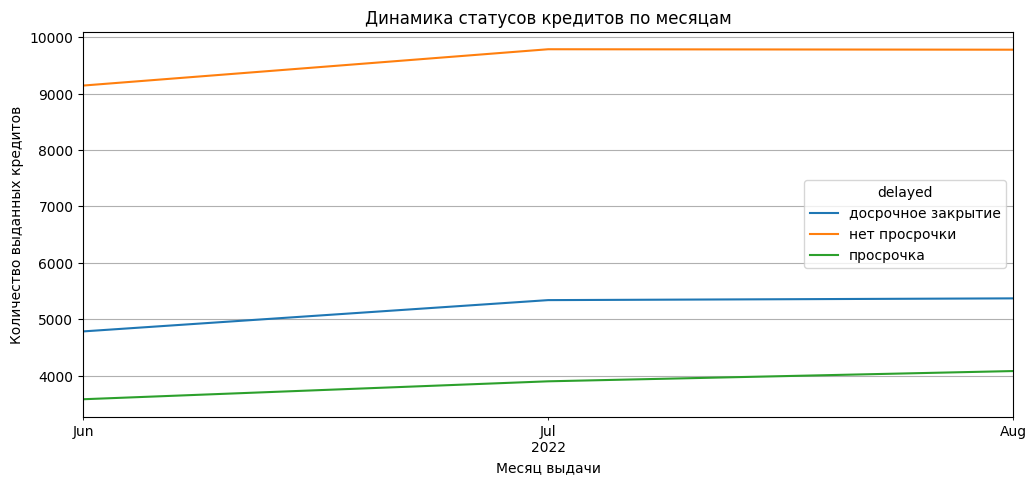

delayed,досрочное закрытие,нет просрочки,просрочка
created_month,,,
2022-06,4782,9142,3579
2022-07,5337,9786,3897
2022-08,5368,9778,4079


In [39]:
dinam_status = result_table.pivot_table(index='created_month', columns='delayed', values = 'order_id', aggfunc='count')
dinam_status.plot( grid=True, figsize=(12, 5))
plt.title('Динамика статусов кредитов по месяцам')
plt.xlabel('Месяц выдачи')
plt.ylabel('Количество выданных кредитов')
plt.show()

display(dinam_status)

Средняя сумма полученных кредитов в разрезе по месяцам.

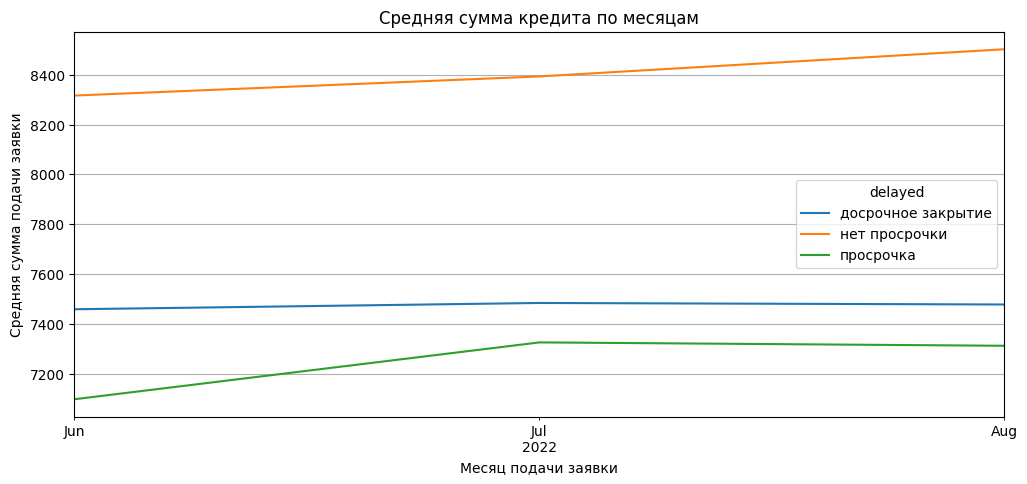

delayed,досрочное закрытие,нет просрочки,просрочка
created_month,,,
2022-06,7458.176495,8316.325749,7096.862252
2022-07,7483.455125,8393.120785,7325.134719
2022-08,7477.324888,8502.310288,7311.591076


In [40]:
issum = result_table.pivot_table(index='created_month', columns='delayed', values = 'issued_sum', aggfunc='mean')
issum.plot( grid=True, figsize=(12, 5))
plt.title('Средняя сумма кредита по месяцам')
plt.xlabel('Месяц подачи заявки')
plt.ylabel('Средняя сумма подачи заявки')
plt.show()

display(issum)

График распределения категории клиентов которые допустили просрочку платежа в процентном соотношении.

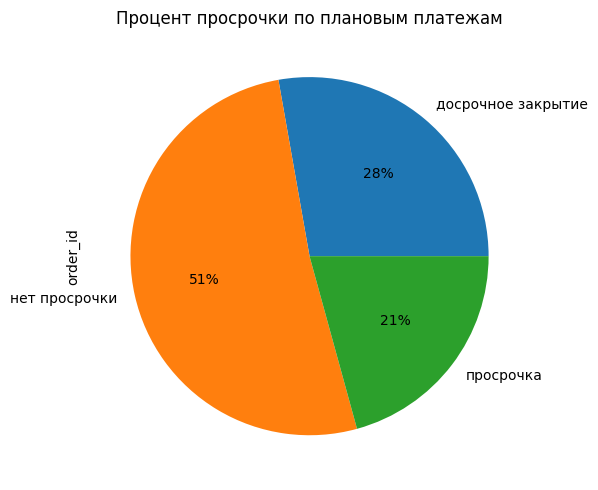

In [41]:
plt.figure(figsize=(8, 5))
result_table.groupby(['delayed'])['order_id'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Процент просрочки по плановым платежам')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Вывод

В ходе работы провели загрузку и предварительный анализ датасетов. Произвели предобработку - удалили дубликаты, работа с типом данных.  Объединили датасеты по ключу, выделили основные категории клиентов: 1) допустили просрочку, 2) закрыли договор досрочно, 3) не допускали просрочки.

На основе произведенного анализа поведения клиентов в отношении просрочек платежей можно сделать следующие выводы:

Процент просрочки плановых платежей - 21%. Но наблюдатся заявки, по которым клиенты закрывают долги досрочно - 28%. Остальная часть плтатит задолженность, согласно календарю плановых платежей.

Кредиты полученные на большую сумму клиенты стараются не допускать задержку планового платежа, скорее всего из-за процентов. Средняя сумма таких заявок от 8000р.
Чего нельзя сказать о заявках на кредиты на меньшу сумму, до 7400р.

Был выделен тип клиентов, которые закрывали договор досрочно. Сумма таких договоров в среднем находилась на уровне 7,5 т.р.

Видна положительная динамика на количество оформленных заявок на кредит. Причем наблюдается так же и небольшой рост количества заявок клиентам, которые в процессе выплат допустили просрочку платежа - не успели внести денежные средства вовремя на счет в необходимом количестве. Так же если смотреть со стороны средних сумм одобренных и полученных денежных средств, то здесь видим явных подьем в период с июня по июль.


Для возможности произвести более детальный анализ, необходимо больше данных о клиентах.
